In [1374]:
!pip install seaborn
!pip install statsmodels

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# LogReg
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve, 
    classification_report, 
    confusion_matrix
)

In [1375]:
df = pd.read_csv('loan_data.csv')

В архиве данные по банковским кредитам. Надо сделать EDA, обучить модель регрессии, провалидироваться. Изучите гиперпараметры логистической регрессии в документации sklearn, поиграйтесь с разными гиперпараметрами для получения лучшего результата. Валидируйтесь по F1, roc_auc. Заодно постройте кривую roc_auc. Так же делайте кроссвалидацию, как показывал на уроке.

| Column | Description | Type |
|--------|-------------|------|
| person_age | Age of the person | Float |
| person_gender | Gender of the person | Categorical |
| person_education | Highest education level | Categorical |
| person_income | Annual income | Float |
| person_emp_exp | Years of employment experience | Integer |
| person_home_ownership | Home ownership status (e.g., rent, own, mortgage) | Categorical |
| loan_amnt | Loan amount requested | Float |
| loan_intent | Purpose of the loan | Categorical |
| loan_int_rate | Loan interest rate | Float |
| loan_percent_income | Loan amount as a percentage of annual income | Float |
| cb_person_cred_hist_length | Length of credit history in years | Float |
| credit_score | Credit score of the person | Integer |
| previous_loan_defaults_on_file | Indicator of previous loan defaults | Categorical |
| loan_status (target variable) | Loan approval status: 1 = approved; 0 = rejected | Integer |

In [1376]:
df.shape

(45000, 14)

In [1377]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0000,female,Master,71948.0000,0,RENT,35000.0000,PERSONAL,16.0200,0.4900,3.0000,561,No,1
1,21.0000,female,High School,12282.0000,0,OWN,1000.0000,EDUCATION,11.1400,0.0800,2.0000,504,Yes,0
2,25.0000,female,High School,12438.0000,3,MORTGAGE,5500.0000,MEDICAL,12.8700,0.4400,3.0000,635,No,1
3,23.0000,female,Bachelor,79753.0000,0,RENT,35000.0000,MEDICAL,15.2300,0.4400,2.0000,675,No,1
4,24.0000,male,Master,66135.0000,1,RENT,35000.0000,MEDICAL,14.2700,0.5300,4.0000,586,No,1


In [1378]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0000,male,Associate,47971.0000,6,RENT,15000.0000,MEDICAL,15.6600,0.3100,3.0000,645,No,1
44996,37.0000,female,Associate,65800.0000,17,RENT,9000.0000,HOMEIMPROVEMENT,14.0700,0.1400,11.0000,621,No,1
44997,33.0000,male,Associate,56942.0000,7,RENT,2771.0000,DEBTCONSOLIDATION,10.0200,0.0500,10.0000,668,No,1
44998,29.0000,male,Bachelor,33164.0000,4,RENT,12000.0000,EDUCATION,13.2300,0.3600,6.0000,604,No,1
44999,24.0000,male,High School,51609.0000,1,RENT,6665.0000,DEBTCONSOLIDATION,17.0500,0.1300,3.0000,628,No,1


In [1379]:
df.isnull().sum() # проверка пустых значений в данных

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [1380]:
df.select_dtypes(include=[np.number]).columns.tolist() # числовые значения

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [1381]:
df.select_dtypes(include=['object']).columns.tolist() # категориальные

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [1382]:
df.sample(5, random_state=42) # рандомная выборка для наглядности дальнейшего анализа

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
37979,32.0000,male,Associate,96865.0000,10,MORTGAGE,7500.0000,EDUCATION,6.0400,0.0800,10.0000,601,No,0
9911,24.0000,male,Associate,56838.0000,6,RENT,9000.0000,EDUCATION,11.4900,0.1600,4.0000,647,Yes,0
43386,22.0000,female,Master,37298.0000,0,RENT,5000.0000,MEDICAL,14.8800,0.1300,4.0000,711,No,1
13822,23.0000,female,Bachelor,39944.0000,1,OWN,5000.0000,VENTURE,13.9900,0.1300,3.0000,597,Yes,0
44810,42.0000,male,High School,67974.0000,20,MORTGAGE,10000.0000,HOMEIMPROVEMENT,15.4100,0.1500,11.0000,586,No,1


In [1383]:
df.groupby(['person_age']).count()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,,,,,,,,,,,,,
20.0000,17,17,17,17,17,17,17,17,17,17,17,17,17
21.0000,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
22.0000,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236
23.0000,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254
24.0000,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138
25.0000,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507
26.0000,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659
27.0000,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095
28.0000,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728


Возрасты 109 116 123 и 144 выглядят аномальными. Надо будет учесть при обучении.

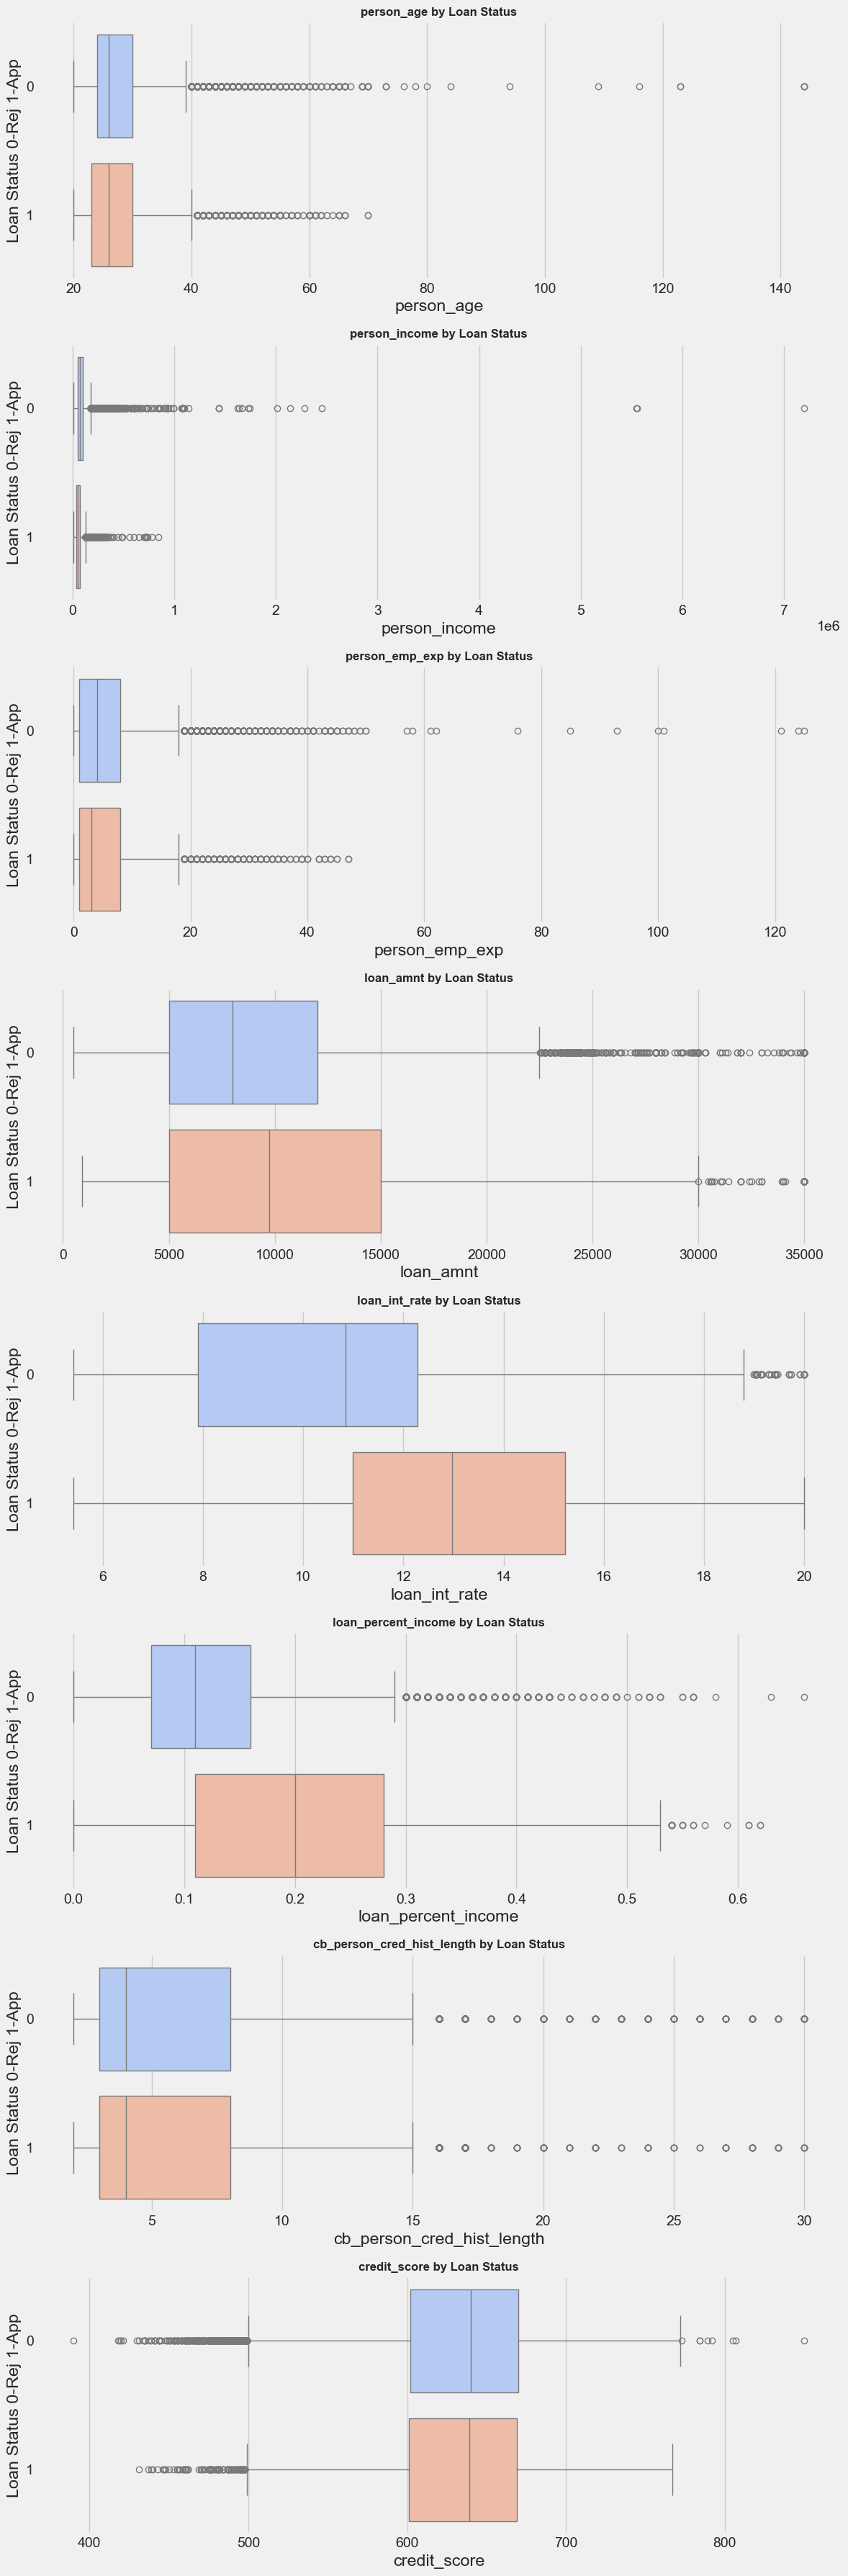

In [1384]:
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                  'credit_score']

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 36))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y='loan_status', x=col, ax=axes[i], palette='coolwarm', orient='h')
    axes[i].set_title(f'{col} by Loan Status', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Loan Status 0-Rej 1-App')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Все числовые фичи имеют выбросы.

В среднем `person age` особо не влияет, разве что, чуть выше нижний порог для решения о выдаче кредита.

БОльший верхний порог `load_amnt` снижает вероятность выдачи кредита.

БОльший верхний порог  `load_int_rate` снижает вероятность выдачи кредита.

БОльший верхний порог  `loan_person_income` снижает вероятность выдачи кредита.

`credit_score` в среднем совпадает по `loan_status`.

Посмотрим тоже самое без выбросов.

До удаления выбросов: 45000 строк
После удаления выбросов: 18642 строк
Удалено: 26358 строк (58.57%)


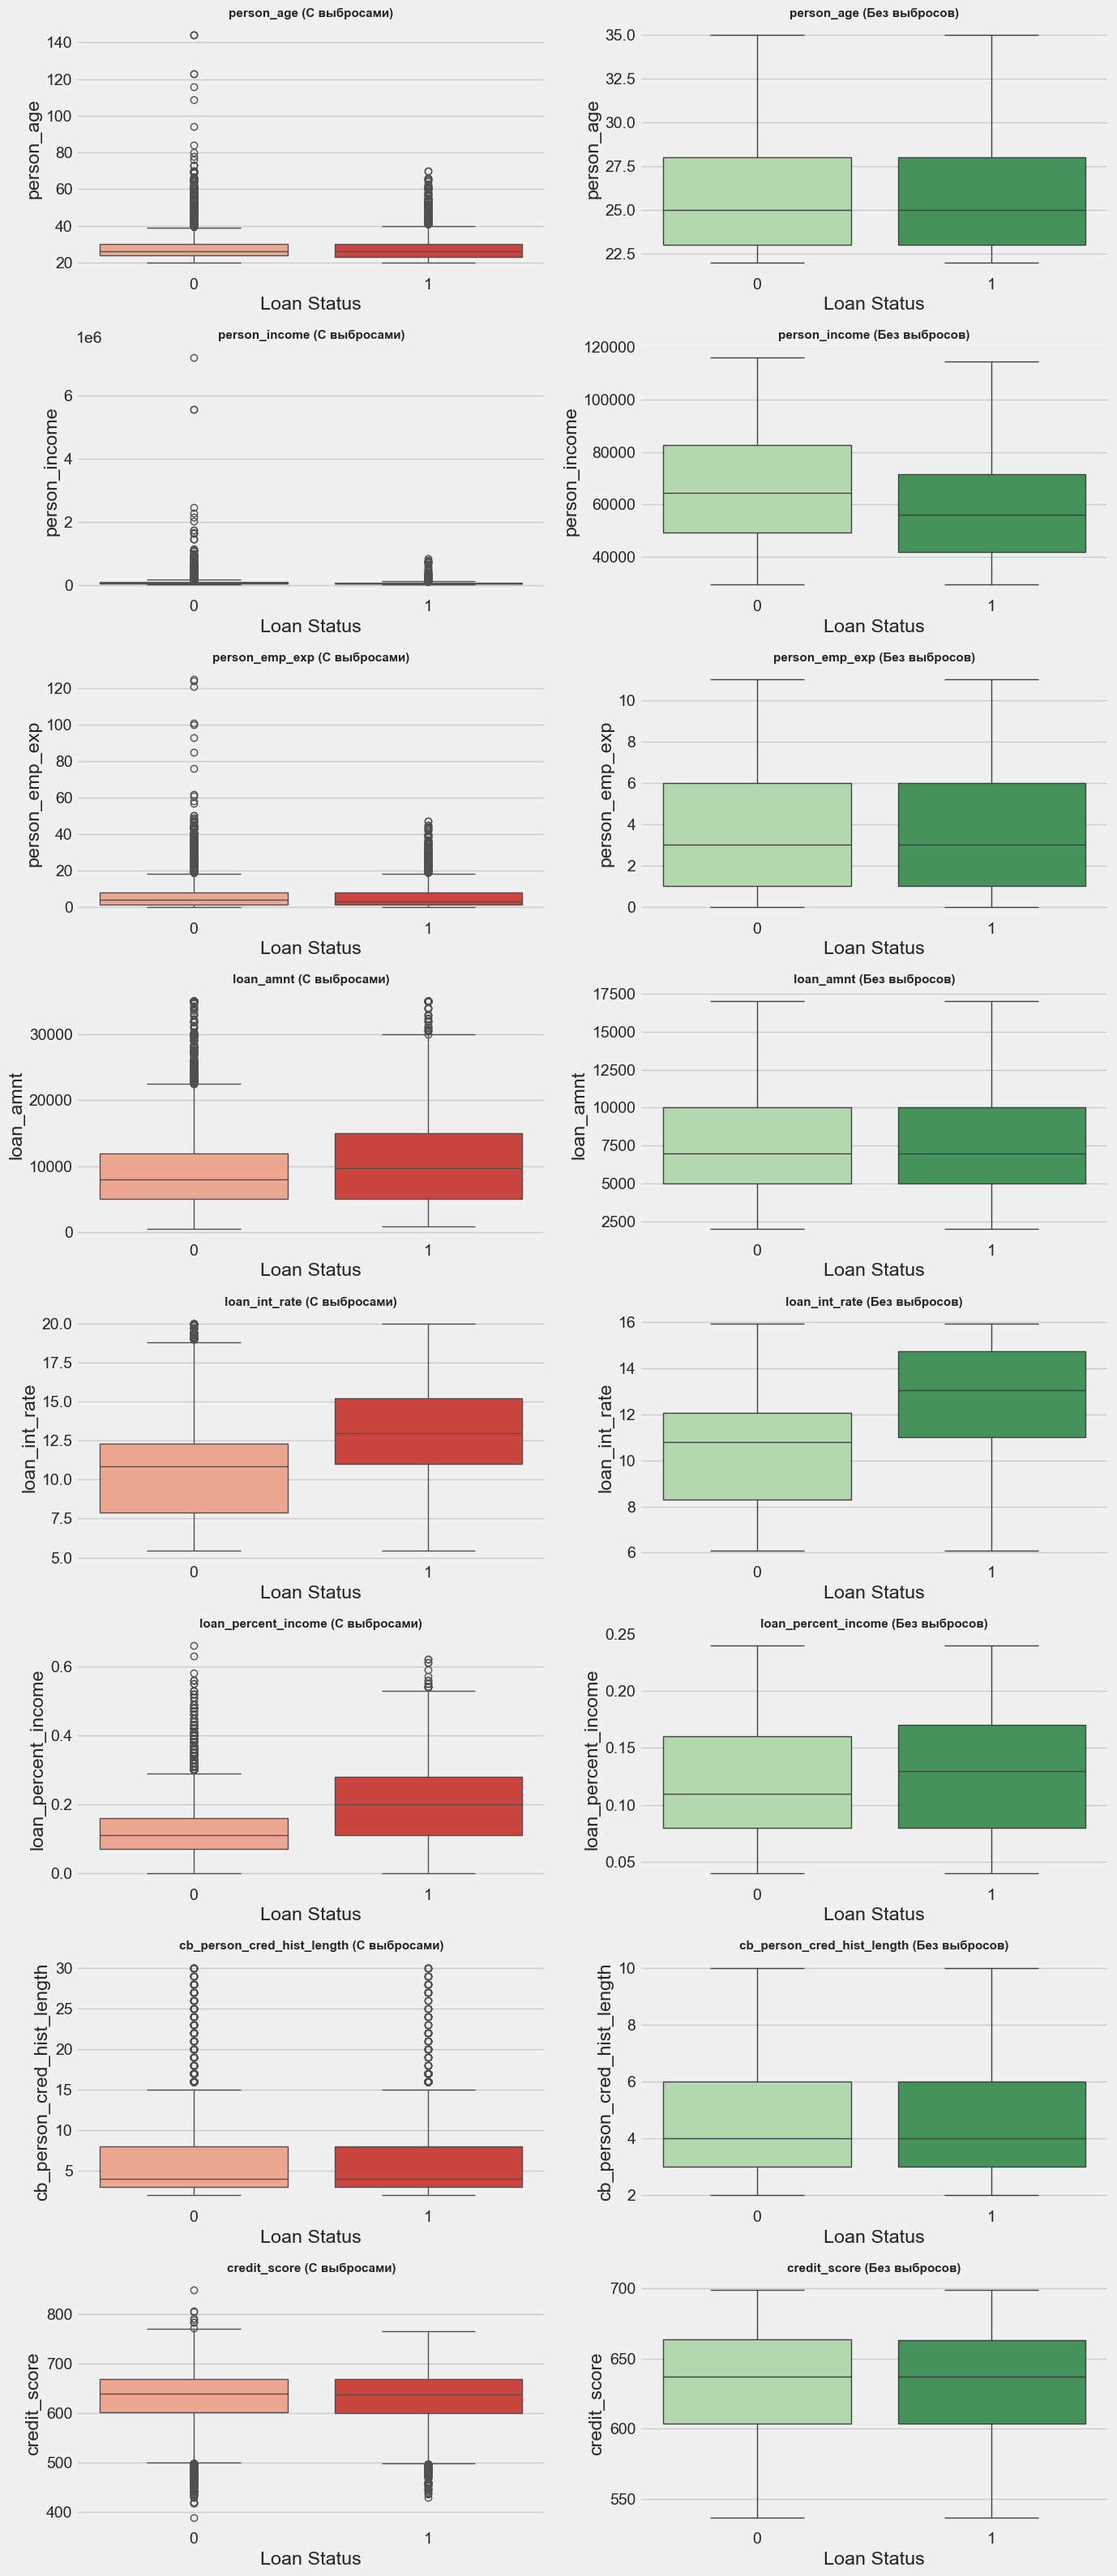

In [1385]:
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
                  'credit_score']

# Индивидуальные настройки перцентилей для каждой колонки
percentile_settings = {
    'person_age': (0.05, 0.90),
    'person_income': (0.05, 0.85),          # Более агрессивно сверху
    'person_emp_exp': (0.05, 0.95),
    'loan_amnt': (0.05, 0.90),
    'loan_int_rate': (0.05, 0.95),
    'loan_percent_income': (0.05, 0.90),    # Более агрессивно сверху
    'cb_person_cred_hist_length': (0.05, 0.95),
    'credit_score': (0.05, 0.95)
}

# Функция с индивидуальными перцентилями
def remove_outliers_custom(data, settings):
    df_clean = data.copy()
    for col, (lower, upper) in settings.items():
        lower_bound = df_clean[col].quantile(lower)
        upper_bound = df_clean[col].quantile(upper)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers_custom(df, percentile_settings)

print(f"До удаления выбросов: {len(df)} строк")
print(f"После удаления выбросов: {len(df_clean)} строк")
print(f"Удалено: {len(df) - len(df_clean)} строк ({((len(df) - len(df_clean)) / len(df) * 100):.2f}%)")

# Сравнительные графики
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 32))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='loan_status', y=col, ax=axes[i, 0], palette='Reds')
    axes[i, 0].set_title(f'{col} (С выбросами)', fontsize=11, fontweight='bold')
    axes[i, 0].set_xlabel('Loan Status')
    
    sns.boxplot(data=df_clean, x='loan_status', y=col, ax=axes[i, 1], palette='Greens')
    axes[i, 1].set_title(f'{col} (Без выбросов)', fontsize=11, fontweight='bold')
    axes[i, 1].set_xlabel('Loan Status')

plt.tight_layout()
plt.show()

До удаления выбросов: 45000 строк
После удаления выбросов: 18642 строк
Удалено: 26358 строк (58.57%)

Выбросы составляют огромную часть датасета, их надо обязательно учитывать, можно в некоторых значениях будет удалить аномальные значения или пару максимальных абсолютных значений из обучающей выборки.

Посмотрим корреляции признаков.

In [1386]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(3).to_string())

                            person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status
person_age                      1.0000         0.1940          0.9540     0.0510         0.0130              -0.0430                      0.8620        0.1780      -0.0210
person_income                   0.1940         1.0000          0.1860     0.2420         0.0020              -0.2340                      0.1240        0.0360      -0.1360
person_emp_exp                  0.9540         0.1860          1.0000     0.0450         0.0170              -0.0400                      0.8240        0.1860      -0.0200
loan_amnt                       0.0510         0.2420          0.0450     1.0000         0.1460               0.5930                      0.0430        0.0090       0.1080
loan_int_rate                   0.0130         0.0020          0.0170     0.1460         1.0000               0.1250                      0.

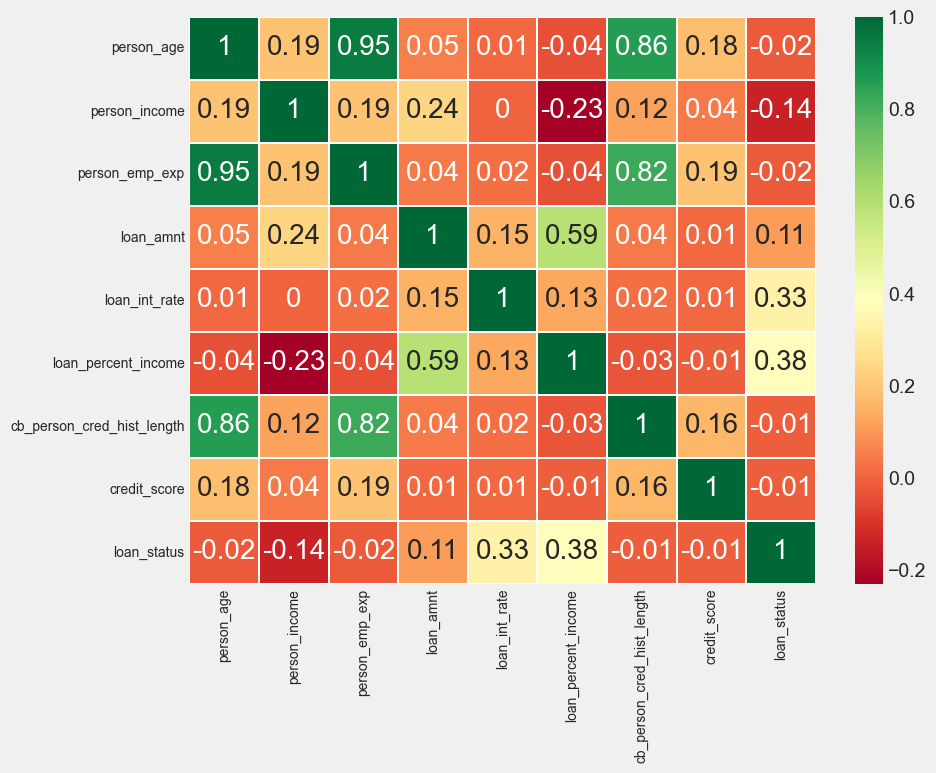

In [1387]:
sns.heatmap(numeric_df.corr().round(2), annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

На наш таргет `loan_status` положительно влияют `loan_int_rate` и `loan_percent_income` - то есть ставка и сумма заёма (в процентах от годового дохода заёмщика).
Немного отрицательно влияет `person_income`. Слабо положительно влияет `loan_amnt`.

Если брать корреляцию фичей, то стоит отметить:
`cb_person_cred_hist_length` (годы кредитной истории) и `person_emp_exp` (рабочий стаж).
`person_age` с`cb_person_cred_hist_length` и `person_emp_exp`.
Слабая корреляция `person_age`и таргет `loan_status`.

Ожидаемо коллинеарны размер и процент размера кредита `loan_amnt` от годового дохода `loan_percent_income`

Отрицательно слабо влияет `person_income` на таргет `loan_status`

`person_income` положительно коррелирует с `loan_amnt`, больше получаешь - больший заем запрашиваешь.

`person_income` отрицательно коррелирует с `loan_percent_income`, больше получаешь - меньший заем запрашиваешь, видимо есть сбережения.

`loan_amnt` положительно коррелирует с `loan_int_rate`. чем больше размер ипотеки, тем выше ставка. видимо банк снижает риск невыплат для бОльших займов более высокой ставкой.

---

На `credis_score` положительно влияют пололожительно `person_emp_exp` (стаж) , `person_age` , `cb_person_cred_hist_length` (годы кредитной истории) и слабо `person_income`.

In [1388]:
df.groupby('credit_score').count()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
credit_score,,,,,,,,,,,,,
390,1,1,1,1,1,1,1,1,1,1,1,1,1
418,1,1,1,1,1,1,1,1,1,1,1,1,1
419,1,1,1,1,1,1,1,1,1,1,1,1,1
420,1,1,1,1,1,1,1,1,1,1,1,1,1
421,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,1,1,1,1,1,1,1,1,1,1,1,1
792,1,1,1,1,1,1,1,1,1,1,1,1,1
805,1,1,1,1,1,1,1,1,1,1,1,1,1


In [1389]:
df.groupby('loan_status').mean(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_status,,,,,,,,
0,27.8336,86157.0407,5.4767,9219.5769,10.4780,0.1218,5.8983,632.8149
1,27.5213,59886.0969,5.1780,10855.6898,12.8568,0.2025,5.7597,631.8872


In [1390]:
df.groupby('loan_status').median(numeric_only=True) # медиана устойчива к выбросам, а мы помним у нас их большая часть датасета

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_status,,,,,,,,
0,26.0000,72928.0000,4.0000,8000.0000,10.8500,0.1100,4.0000,640.0000
1,26.0000,50629.0000,3.0000,9750.0000,12.9800,0.2000,4.0000,639.0000


Судя по медианным значениям, очень интересно, что меньший доход с меньшим стажем, но с бОльшим размером тела кредита и ставкой скорее получит ипотеку, чем с бОльшим доходом, меньшим телом кредита и меньшей ставкой, и все это при одинаковом возрасте.

In [1391]:
df.groupby('person_income').median(numeric_only=True) # по этой выборке следует чем ниже доход, тем вероятней выдача займа, наверно это просто такой случайный вывод.

,person_age,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_income,,,,,,,,
8000.0000,25.0000,5.0000,1400.0000,12.7300,0.1800,4.0000,632.0000,1.0000
8037.0000,29.0000,10.0000,3250.0000,8.5900,0.4000,9.0000,621.0000,1.0000
8104.0000,37.0000,16.0000,1300.0000,6.0300,0.1600,11.0000,561.0000,1.0000
8186.0000,21.0000,0.0000,1600.0000,14.6100,0.2000,3.0000,495.0000,1.0000
8248.0000,29.0000,8.0000,3057.0000,9.2900,0.3700,9.0000,712.0000,1.0000
...,...,...,...,...,...,...,...,...
2280980.0000,60.0000,37.0000,1500.0000,11.0100,0.0000,21.0000,682.0000,0.0000
2448661.0000,42.0000,16.0000,8450.0000,12.2900,0.0000,15.0000,635.0000,0.0000
5545545.0000,116.0000,93.0000,3823.0000,12.1500,0.0000,24.0000,708.0000,0.0000


In [1392]:
df.groupby('loan_percent_income').median(numeric_only=True) # чем выше процент займа к годовому доходу - тем вероятней выдача.

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,cb_person_cred_hist_length,credit_score,loan_status
loan_percent_income,,,,,,,,
0.0000,41.0000,994533.0000,19.0000,3823.0000,11.0100,14.0000,637.0000,0.0000
0.0100,28.0000,121164.0000,5.0000,1500.0000,10.2600,6.0000,645.0000,0.0000
0.0200,26.0000,90672.5000,4.0000,1997.0000,11.0000,4.0000,642.0000,0.0000
0.0300,27.0000,88320.5000,5.0000,2616.5000,10.9900,5.0000,640.0000,0.0000
0.0400,27.0000,85340.5000,4.0000,3500.0000,10.9600,5.0000,641.0000,0.0000
...,...,...,...,...,...,...,...,...
0.5900,23.0000,23561.0000,1.0000,13897.0000,8.6700,3.0000,671.0000,1.0000
0.6100,26.5000,19904.0000,5.0000,12162.5000,9.0100,4.0000,610.5000,1.0000
0.6200,28.0000,35824.5000,6.0000,22150.0000,10.4400,3.5000,661.5000,1.0000


In [1393]:
df.groupby('loan_int_rate').median(numeric_only=True) # чем выше ставка, тем вероятней выдача займа

,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
loan_int_rate,,,,,,,,
5.4200,26.0000,69293.5000,3.0000,6000.0000,0.0800,4.0000,635.0000,0.0000
5.4300,36.0000,41514.5000,12.5000,4800.0000,0.1200,9.0000,666.5000,0.0000
5.4400,24.5000,97023.0000,3.5000,7500.0000,0.0850,3.0000,681.5000,0.0000
5.4600,24.0000,53569.0000,0.0000,10798.0000,0.2000,4.0000,674.0000,0.0000
5.4700,28.0000,60963.0000,6.0000,6000.0000,0.0800,8.0000,673.0000,0.0000
...,...,...,...,...,...,...,...,...
19.8000,31.0000,100407.0000,9.0000,17783.0000,0.1800,8.0000,655.0000,1.0000
19.8200,23.0000,46461.0000,0.0000,15000.0000,0.2600,3.0000,666.0000,1.0000
19.9000,24.0000,54191.0000,0.0000,15770.0000,0.2900,4.0000,557.0000,1.0000


In [1394]:
df.groupby('credit_score').median(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
credit_score,,,,,,,,
390,28.0000,36977.0000,4.0000,3000.0000,7.2900,0.0800,7.0000,0.0000
418,23.0000,73126.0000,0.0000,20000.0000,7.8500,0.2700,3.0000,0.0000
419,26.0000,26606.0000,1.0000,1580.0000,11.0300,0.0600,7.0000,0.0000
420,29.0000,102856.0000,5.0000,8469.0000,11.3200,0.0800,6.0000,0.0000
421,23.0000,25292.0000,0.0000,4000.0000,12.2300,0.1600,2.0000,0.0000
...,...,...,...,...,...,...,...,...
789,144.0000,300616.0000,125.0000,4800.0000,13.5700,0.0200,3.0000,0.0000
792,109.0000,5556399.0000,85.0000,6195.0000,12.5800,0.0000,22.0000,0.0000
805,123.0000,97140.0000,101.0000,20400.0000,10.2500,0.2100,3.0000,0.0000


Не очень понятна зависимость `credit_score` и `loan_status`

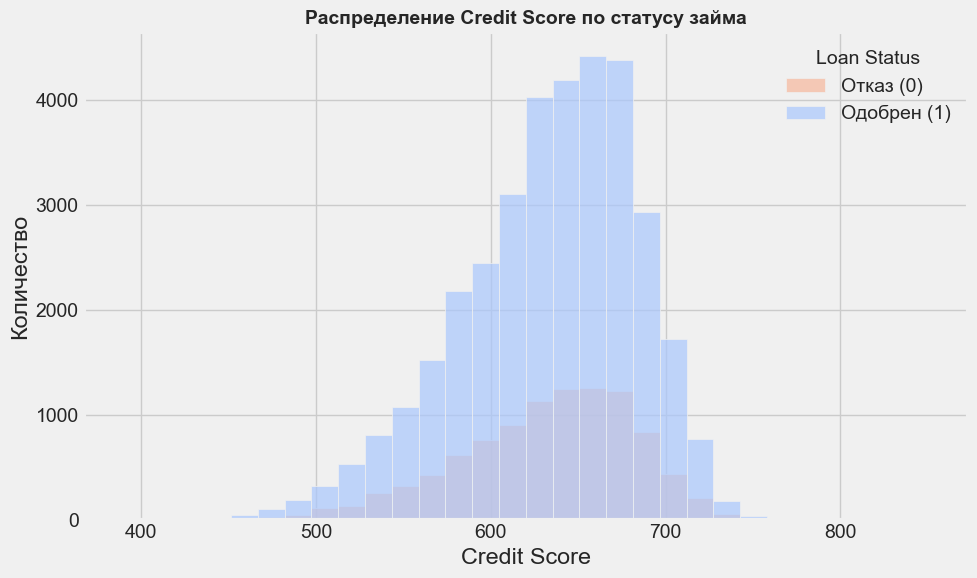

In [1395]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='credit_score', hue='loan_status', bins=30, palette='coolwarm', alpha=0.7)
plt.title('Распределение Credit Score по статусу займа', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Количество')
plt.legend(title='Loan Status', labels=['Отказ (0)', 'Одобрен (1)'])
plt.tight_layout()
plt.show()


In [1396]:
# Проверяем график
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

похоже на правду


In [1397]:
df.groupby('loan_status')['credit_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,35000.0000,632.8149,50.4753,390.0000,602.0000,640.0000,670.0000,850.0000
1,10000.0000,631.8872,50.2935,431.0000,601.0000,639.0000,669.0000,767.0000


Получается, что кредитный скоринг не основной параметр, по которому принимается решение.

In [1398]:
correlations = df.select_dtypes(include=['number']).corr()['loan_status'].sort_values(ascending=False)
print(correlations)

loan_status                   1.0000
loan_percent_income           0.3849
loan_int_rate                 0.3320
loan_amnt                     0.1077
credit_score                 -0.0076
cb_person_cred_hist_length   -0.0149
person_emp_exp               -0.0205
person_age                   -0.0215
person_income                -0.1358
Name: loan_status, dtype: float64


Посмотрим на категориальные признаки!

In [1399]:
df.head() # вспомним фичи датасета

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0000,female,Master,71948.0000,0,RENT,35000.0000,PERSONAL,16.0200,0.4900,3.0000,561,No,1
1,21.0000,female,High School,12282.0000,0,OWN,1000.0000,EDUCATION,11.1400,0.0800,2.0000,504,Yes,0
2,25.0000,female,High School,12438.0000,3,MORTGAGE,5500.0000,MEDICAL,12.8700,0.4400,3.0000,635,No,1
3,23.0000,female,Bachelor,79753.0000,0,RENT,35000.0000,MEDICAL,15.2300,0.4400,2.0000,675,No,1
4,24.0000,male,Master,66135.0000,1,RENT,35000.0000,MEDICAL,14.2700,0.5300,4.0000,586,No,1


In [1400]:
df.isnull().sum() # проверка пустых значений в данных

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [1401]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist() # категориальные признаки
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [1402]:
for col in cat_cols:
    print(f"{col}: {len(df[col].dropna().unique())}")
    print(f" {sorted(df[col].dropna().unique())}")
    print()

person_gender: 2
 ['female', 'male']

person_education: 5
 ['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master']

person_home_ownership: 4
 ['MORTGAGE', 'OTHER', 'OWN', 'RENT']

loan_intent: 6
 ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']

previous_loan_defaults_on_file: 2
 ['No', 'Yes']



In [1403]:
# используем One-Hot Encoding
categorical_cols = [
    'person_gender',
    'person_education', 
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

# Создаем OHE для всех категориальных признаков
df_encoded = pd.get_dummies(
    df, 
    columns=categorical_cols,
    prefix=categorical_cols,
    drop_first=True  # Убираем первую категорию каждой переменной
)

print(f"Исходное количество признаков: {df.shape[1]}")
print(f"После OHE количество признаков: {df_encoded.shape[1]}")
print(f"\nНовые колонки:")
for col in df_encoded.columns:
    if any(col.startswith(cat) for cat in categorical_cols):
        print(f"  {col}")

Исходное количество признаков: 14
После OHE количество признаков: 23

Новые колонки:
  person_gender_male
  person_education_Bachelor
  person_education_Doctorate
  person_education_High School
  person_education_Master
  person_home_ownership_OTHER
  person_home_ownership_OWN
  person_home_ownership_RENT
  loan_intent_EDUCATION
  loan_intent_HOMEIMPROVEMENT
  loan_intent_MEDICAL
  loan_intent_PERSONAL
  loan_intent_VENTURE
  previous_loan_defaults_on_file_Yes


In [1404]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0000,female,Master,71948.0000,0,RENT,35000.0000,PERSONAL,16.0200,0.4900,3.0000,561,No,1
1,21.0000,female,High School,12282.0000,0,OWN,1000.0000,EDUCATION,11.1400,0.0800,2.0000,504,Yes,0
2,25.0000,female,High School,12438.0000,3,MORTGAGE,5500.0000,MEDICAL,12.8700,0.4400,3.0000,635,No,1
3,23.0000,female,Bachelor,79753.0000,0,RENT,35000.0000,MEDICAL,15.2300,0.4400,2.0000,675,No,1
4,24.0000,male,Master,66135.0000,1,RENT,35000.0000,MEDICAL,14.2700,0.5300,4.0000,586,No,1


In [1405]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0000,71948.0000,0,35000.0000,16.0200,0.4900,3.0000,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0000,12282.0000,0,1000.0000,11.1400,0.0800,2.0000,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0000,12438.0000,3,5500.0000,12.8700,0.4400,3.0000,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0000,79753.0000,0,35000.0000,15.2300,0.4400,2.0000,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0000,66135.0000,1,35000.0000,14.2700,0.5300,4.0000,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [1406]:
corr_matrix = df_encoded.select_dtypes(include=[np.number]).corr()
print(corr_matrix.round(2).to_string()) # округлим для простоты

                            person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status
person_age                      1.0000         0.1900          0.9500     0.0500         0.0100              -0.0400                      0.8600        0.1800      -0.0200
person_income                   0.1900         1.0000          0.1900     0.2400         0.0000              -0.2300                      0.1200        0.0400      -0.1400
person_emp_exp                  0.9500         0.1900          1.0000     0.0400         0.0200              -0.0400                      0.8200        0.1900      -0.0200
loan_amnt                       0.0500         0.2400          0.0400     1.0000         0.1500               0.5900                      0.0400        0.0100       0.1100
loan_int_rate                   0.0100         0.0000          0.0200     0.1500         1.0000               0.1300                      0.

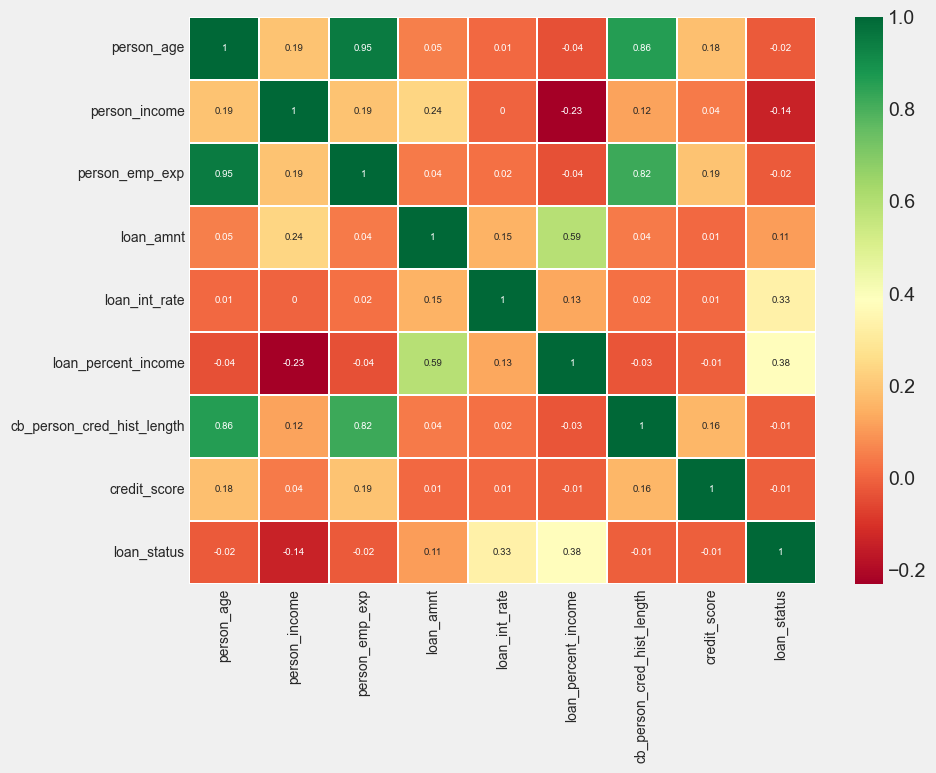

In [1407]:
sns.heatmap(df_encoded.select_dtypes(include=['number']).corr().round(2), annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size':7})
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

На `loan_status` больше всего влияет:
1) +0,38 `loan_percent_income`
2) +0.33 `loan_int_rate`
3) -0,14 `person_income`
4) 0,11 `loan_amnt`

In [1408]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist() # числовые значения
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [1409]:
# Посмотрим зависимость закодированных категориальных признаков. На занятиях не было, дипсикнул Point-Biserial Correlation с таргетом.
from scipy.stats import pointbiserialr

binary_cols = [col for col in df_encoded.columns 
               if any(col.startswith(prefix) for prefix in categorical_cols)]

numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

target_col = 'loan_status'

def calculate_pb_correlation(df, numeric_col, binary_col):
    """Рассчитывает point-biserial корреляцию"""
    corr, p_value = pointbiserialr(df[numeric_col].dropna(), 
                                   df[binary_col].dropna())
    return corr, p_value

for num_col in numeric_cols:
    print(f"\n{num_col}:")
    print("-" * 40)
    
    correlations = []
    for bin_col in binary_cols[:10]:  # Ограничим для наглядности
        try:
            corr, p_val = calculate_pb_correlation(df_encoded, num_col, bin_col)
            correlations.append((bin_col, corr, p_val))
        except Exception as e:
            print(f"  Ошибка для {bin_col}: {e}")
    
    # Сортируем по абсолютному значению корреляции
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    
    for bin_col, corr, p_val in correlations[:5]:  # Покажем топ-5
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        print(f"  {bin_col:40}: {corr:7.3f} (p={p_val:.4f}) {significance}")


person_age:
----------------------------------------
  person_education_Doctorate              :   0.113 (p=0.0000) ***
  loan_intent_EDUCATION                   :  -0.083 (p=0.0000) ***
  loan_intent_HOMEIMPROVEMENT             :   0.068 (p=0.0000) ***
  person_education_Bachelor               :  -0.055 (p=0.0000) ***
  person_home_ownership_RENT              :  -0.036 (p=0.0000) ***

person_income:
----------------------------------------
  person_home_ownership_RENT              :  -0.199 (p=0.0000) ***
  person_home_ownership_OWN               :  -0.039 (p=0.0000) ***
  loan_intent_HOMEIMPROVEMENT             :   0.038 (p=0.0000) ***
  loan_intent_EDUCATION                   :  -0.016 (p=0.0007) ***
  person_gender_male                      :   0.010 (p=0.0309) *

person_emp_exp:
----------------------------------------
  person_education_Doctorate              :   0.107 (p=0.0000) ***
  loan_intent_EDUCATION                   :  -0.073 (p=0.0000) ***
  loan_intent_HOMEIMPROVEMENT

In [1410]:
if 'loan_status' not in df_encoded.columns:
    df_encoded['loan_status'] = df['loan_status']

results = []

for bin_col in binary_cols:
    try:
        corr, p_val = pointbiserialr(df_encoded['loan_status'], 
                                    df_encoded[bin_col])
        results.append({
            'feature': bin_col,
            'correlation': corr,
            'abs_correlation': abs(corr),
            'p_value': p_val,
            'significant': p_val < 0.05
        })
    except Exception as e:
        print(f"Ошибка для {bin_col}: {e}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('abs_correlation', ascending=False)

print("\n" + "="*70)
print("Корреляции OHE признаков с целевой переменной (loan_status)")
print("="*70)
print(f"Всего признаков: {len(results_df)}")
print(f"Статистически значимых (p<0.05): {results_df['significant'].sum()}")

# Выводим топ-20
print("\nТоп-20 наиболее коррелированных признаков:")
print("-" * 80)
for idx, row in results_df.head(20).iterrows():
    significance = "✓" if row['significant'] else " "
    print(f"[{significance}] {row['feature']:45} : {row['correlation']:7.3f} (p={row['p_value']:.6f})")


Корреляции OHE признаков с целевой переменной (loan_status)
Всего признаков: 14
Статистически значимых (p<0.05): 9

Топ-20 наиболее коррелированных признаков:
--------------------------------------------------------------------------------
[✓] previous_loan_defaults_on_file_Yes            :  -0.543 (p=0.000000)
[✓] person_home_ownership_RENT                    :   0.255 (p=0.000000)
[✓] person_home_ownership_OWN                     :  -0.094 (p=0.000000)
[✓] loan_intent_VENTURE                           :  -0.086 (p=0.000000)
[✓] loan_intent_MEDICAL                           :   0.065 (p=0.000000)
[✓] loan_intent_EDUCATION                         :  -0.064 (p=0.000000)
[✓] loan_intent_HOMEIMPROVEMENT                   :   0.034 (p=0.000000)
[✓] loan_intent_PERSONAL                          :  -0.022 (p=0.000002)
[✓] person_home_ownership_OTHER                   :   0.014 (p=0.003795)
[ ] person_education_Master                       :  -0.005 (p=0.314528)
[ ] person_education_Bachelor

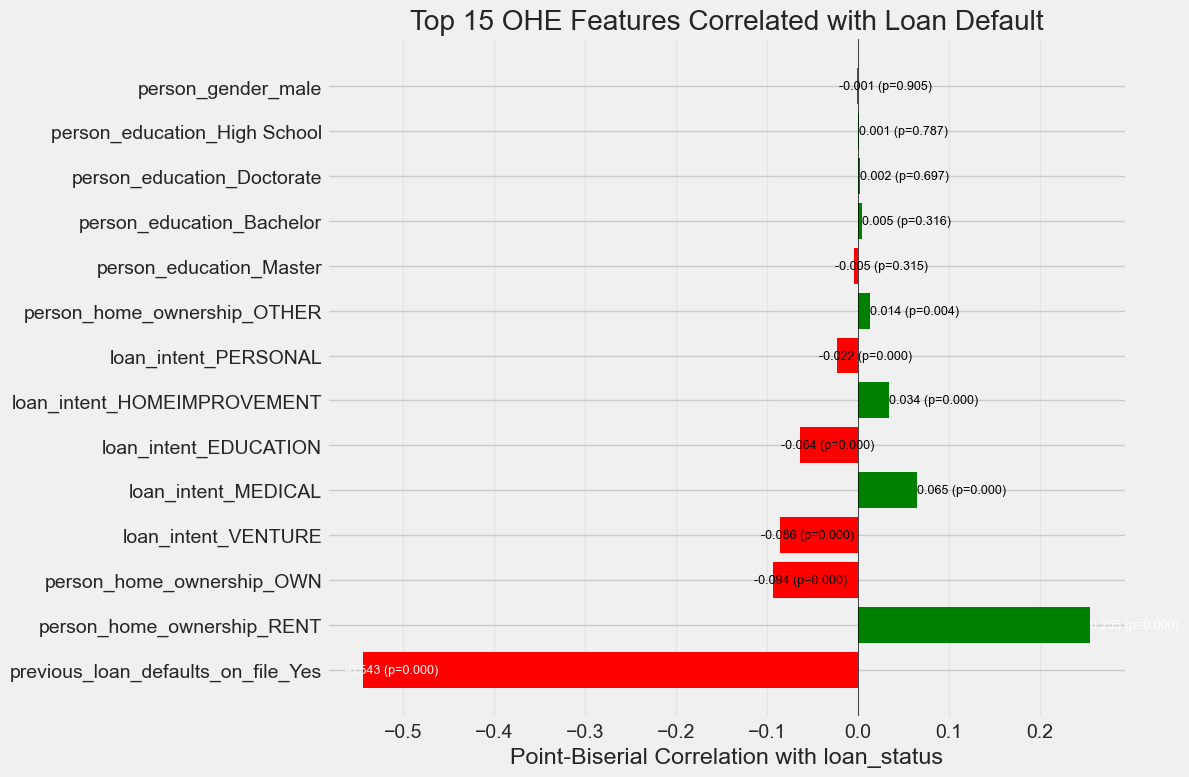

In [1411]:
# Построим корреляцию признаков булевых значений и таргета
top_n = 15
top_features = results_df.head(top_n)

plt.figure(figsize=(12, 8))

# Барплот
colors = ['green' if x > 0 else 'red' for x in top_features['correlation']]
bars = plt.barh(range(len(top_features)), top_features['correlation'], color=colors)

# Настройки графика
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Point-Biserial Correlation with loan_status')
plt.title(f'Top {top_n} OHE Features Correlated with Loan Default')
plt.axvline(x=0, color='black', linewidth=0.5)

# Добавляем значения
for i, (corr, p_val) in enumerate(zip(top_features['correlation'], top_features['p_value'])):
    plt.text(corr if corr > 0 else corr - 0.02, i, 
             f'{corr:.3f} (p={p_val:.3f})',
             va='center',
             fontsize=9,
             color='white' if abs(corr) > 0.1 else 'black')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [1412]:
# Распределение loan_status по defaults
print(pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status']))


loan_status                         0      1
previous_loan_defaults_on_file              
No                              12142  10000
Yes                             22858      0


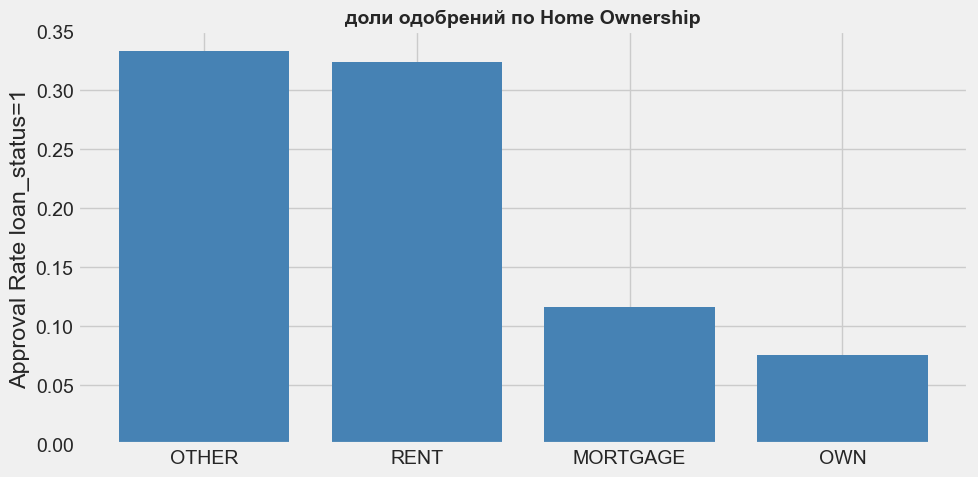

In [1413]:
approval_by_home = df.groupby('person_home_ownership')['loan_status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(approval_by_home.index, approval_by_home.values, color='steelblue')

plt.title('доли одобрений по Home Ownership', fontweight='bold', fontsize=14)
plt.ylabel('Approval Rate loan_status=1')
plt.xlabel('')

plt.tight_layout()
plt.show()


In [1414]:
# Проверим связь с дефолтами
print(pd.crosstab(df['person_home_ownership'], df['previous_loan_defaults_on_file'], normalize='index') * 100)


previous_loan_defaults_on_file      No     Yes
person_home_ownership                         
MORTGAGE                       42.3333 57.6667
OTHER                          59.8291 40.1709
OWN                            39.1732 60.8268
RENT                           55.8333 44.1667


Среди ипотечников (MORTGAGE): 42% не имели дефолтов, 58% имели

Среди других (OTHER): 60% не имели дефолтов, 40% имели

Среди владельцев (OWN): 39% не имели дефолтов, 61% имели

Среди арендаторов (RENT): 56% не имели дефолтов, 44% имели

In [1415]:
df_encoded.select_dtypes(include=['number']).head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0000,71948.0000,0,35000.0000,16.0200,0.4900,3.0000,561,1
1,21.0000,12282.0000,0,1000.0000,11.1400,0.0800,2.0000,504,0
2,25.0000,12438.0000,3,5500.0000,12.8700,0.4400,3.0000,635,1
3,23.0000,79753.0000,0,35000.0000,15.2300,0.4400,2.0000,675,1
4,24.0000,66135.0000,1,35000.0000,14.2700,0.5300,4.0000,586,1


In [1416]:
df_encoded[df_encoded['person_age'] < 100].max()

person_age                                94.0000
person_income                        2448661.0000
person_emp_exp                                 76
loan_amnt                              35000.0000
loan_int_rate                             20.0000
loan_percent_income                        0.6600
cb_person_cred_hist_length                30.0000
credit_score                                  784
loan_status                                     1
person_gender_male                           True
person_education_Bachelor                    True
person_education_Doctorate                   True
person_education_High School                 True
person_education_Master                      True
person_home_ownership_OTHER                  True
person_home_ownership_OWN                    True
person_home_ownership_RENT                   True
loan_intent_EDUCATION                        True
loan_intent_HOMEIMPROVEMENT                  True
loan_intent_MEDICAL                          True


In [1417]:
# Features и Target
X = df_encoded.drop('loan_status', axis=1) # data leak prevention
y = df_encoded['loan_status']

# Classic train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Удаление выброса из train выборки
train_mask = X_train['person_age'] < 100
X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

print(f"Размер обучающей выборки до очистки: {len(X_train)}")
print(f"Размер обучающей выборки после очистки: {len(X_train_clean)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Стандартизация данных робастным скейлером - устойчивым к выбросам.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train_clean)

y_pred = model.predict(X_test_scaled)

probs = model.predict_proba(X_test_scaled)
print(probs)

Размер обучающей выборки до очистки: 31500
Размер обучающей выборки после очистки: 31495
Размер тестовой выборки: 13500
[[0.9674 0.0326]
 [0.9996 0.0004]
 [0.3117 0.6883]
 ...
 [0.9999 0.0001]
 [0.9994 0.0006]
 [0.9995 0.0005]]


Accuracy: 0.8936
F1 Score: 0.7575
ROC-AUC: 0.9531


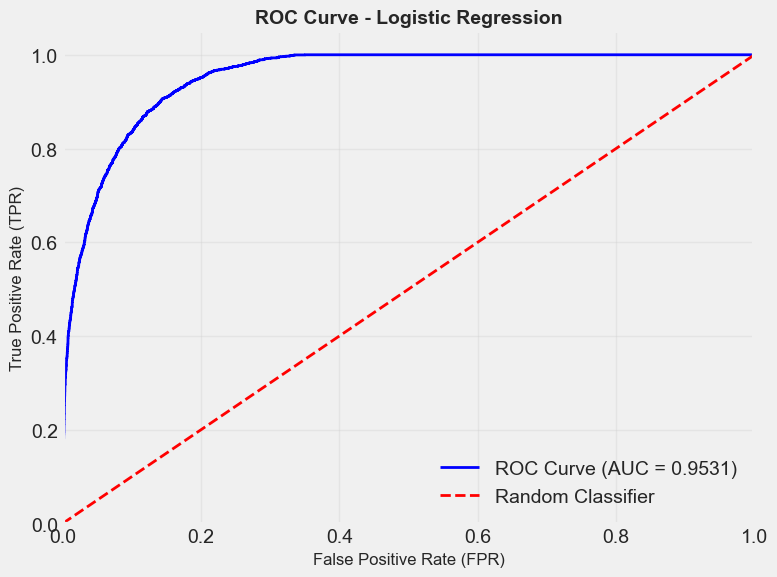


=== Confusion Matrix ===
[[9821  672]
 [ 764 2243]]


In [1418]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# F1
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

In [1419]:
coefficients_data = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

# Сортируем по убыванию
coefficients_data[1] = coefficients_data[1].apply(lambda x: x[0])
coefficients_data.columns = ['feature', 'coefficient']
sorted_coefficients = coefficients_data.sort_values('coefficient', ascending=False)
print(sorted_coefficients)

                               feature  coefficient
5                  loan_percent_income       1.9799
4                        loan_int_rate       1.5034
15          person_home_ownership_RENT       0.6847
13         person_home_ownership_OTHER       0.2725
0                           person_age       0.1913
1                        person_income       0.0825
12             person_education_Master       0.0261
8                   person_gender_male       0.0257
11        person_education_High School       0.0225
17         loan_intent_HOMEIMPROVEMENT       0.0223
9            person_education_Bachelor      -0.0135
6           cb_person_cred_hist_length      -0.0501
10          person_education_Doctorate      -0.1324
2                       person_emp_exp      -0.1637
18                 loan_intent_MEDICAL      -0.2464
7                         credit_score      -0.5947
19                loan_intent_PERSONAL      -0.6481
3                            loan_amnt      -0.7653
16          

- `previous_loan_defaults_on_file_Yes`      -7.6137
Наличие дефолтов в истории - сильнейший признак!

- `loan_percent_income` 1.9799 - Доля кредита в доходе - очень важный признак.
- `loan_int_rate` 1.5034 - Процентная ставка по кредиту тоже влияет.

- `person_home_ownership_RENT` 0.6847 - Тип жилья тоже имеет значение, но только потому что доля такие заемщики не имеют в истории дефолтов.

Попробуем обучить модель без `previous_loan_defaults_on_file_Yes`

In [1420]:
# Features и Target
X = df_encoded.drop('loan_status', axis=1) # data leak prevention
X = X.drop('previous_loan_defaults_on_file_Yes', axis=1) # Удалим сильнейшийый признак
y = df_encoded['loan_status']
# Classic train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Удаление выброса из train выборки
train_mask = X_train['person_age'] < 100
X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

print(f"Размер обучающей выборки до очистки: {len(X_train)}")
print(f"Размер обучающей выборки после очистки: {len(X_train_clean)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Стандартизация данных
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train_clean)

y_pred = model.predict(X_test_scaled)

probs = model.predict_proba(X_test_scaled)
print(probs)

Размер обучающей выборки до очистки: 31500
Размер обучающей выборки после очистки: 31495
Размер тестовой выборки: 13500
[[0.9933 0.0067]
 [0.7722 0.2278]
 [0.3966 0.6034]
 ...
 [0.9013 0.0987]
 [0.835  0.165 ]
 [0.8373 0.1627]]


In [1425]:
coefficients_data = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

# сортируем
coefficients_data[1] = coefficients_data[1].apply(lambda x: x[0])
coefficients_data.columns = ['feature', 'coefficient']
sorted_coefficients = coefficients_data.sort_values('coefficient', ascending=False)
print(sorted_coefficients)

                         feature  coefficient
5            loan_percent_income       1.9790
4                  loan_int_rate       1.5099
15    person_home_ownership_RENT       0.8550
13   person_home_ownership_OTHER       0.7386
1                  person_income       0.0796
0                     person_age       0.0594
17   loan_intent_HOMEIMPROVEMENT       0.0334
8             person_gender_male       0.0041
11  person_education_High School       0.0025
12       person_education_Master      -0.0003
9      person_education_Bachelor      -0.0148
7                   credit_score      -0.0193
2                 person_emp_exp      -0.0349
6     cb_person_cred_hist_length      -0.0522
10    person_education_Doctorate      -0.0802
18           loan_intent_MEDICAL      -0.2340
19          loan_intent_PERSONAL      -0.6366
3                      loan_amnt      -0.7553
16         loan_intent_EDUCATION      -0.8411
20           loan_intent_VENTURE      -1.1076
14     person_home_ownership_OWN  

- `loan_percent_income` 1.9790 - Доля кредита в доходе - очень важный признак.
- `loan_int_rate` 1.5099 - Процентная ставка по кредиту тоже влияет.
- `person_home_ownership_OWN` -1.5037
- `loan_intent_VENTURE` -1.1076
- `person_home_ownership_RENT` 0.8550
- `person_home_ownership_OTHER` 0.7386

немного поинтереснее коэффициенты фичей.


In [1422]:
# Посмотрим метрики на кросс-валидации без удаления выбросов (непонятно как их делать с этой функцией).
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

[0.85   0.8131 0.8267 0.8387 0.822  0.8233 0.8311 0.8404 0.8447 0.8384]
0.8328444444444445

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     10493
           1       0.73      0.49      0.59      3007

    accuracy                           0.85     13500
   macro avg       0.80      0.72      0.75     13500
weighted avg       0.84      0.85      0.83     13500



In [1423]:
predicted = model.predict(X_test)
ones = sum(predicted)
zeros = len(predicted) - ones

print(f"0: {zeros}")
print(f"1: {ones}")

probs = model.predict_proba(X_test)
print(probs)

0: 7809
1: 5691
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


Accuracy: 0.8452
F1 Score: 0.5856
ROC-AUC: 0.8564


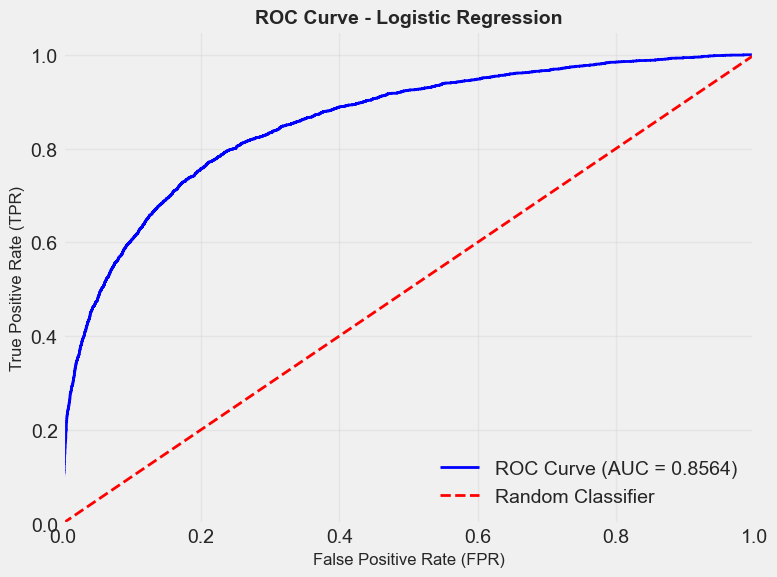


=== Confusion Matrix ===
[[9933  560]
 [1530 1477]]


In [1424]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# F1
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Модель с данными о дефолтах:
- Accuracy: 0.8936
- F1 Score: 0.7575
- ROC-AUC: 0.9531
```
=== Confusion Matrix ===
[[9821  672]
[ 764 2243]]
```
### Класс 0 (Займ не выдан) - 10493 клиента
- TN = 9821  # True Negative: Правильно отказано хорошим клиентам
- FP = 672   # False Positive: ОШИБОЧНО отказано хорошим клиентам

### Класс 1 (Займ выдан) - 3007 клиентов  
- FN = 764 - ОШИБОЧНО одобрено плохим клиентам
- TP = 2243 - Правильно обнаружены плохие клиенты

---

# Модель без данных о дефолтах:
- Accuracy: 0.8452
- F1 Score: 0.5856
- ROC-AUC: 0.8564

```
=== Confusion Matrix ===
[[9933  560]
[1530 1477]]
```
### Класс 0 (Займ не выдан) - 10493 клиента
- TN = 9933  # Правильных отказов больше
- FP = 560   # Меньше ошибок с хорошими клиентами
### Класс 1 (Займ выдан) - 3007 клиентов 
- FN = 1530 - ОШИБОЧНО одобрено плохим клиентам
- TP = 1477  - Правильно обнаружены плохие клиенты

Модель с дефолтами в данных конечно дает лучший результат предсказаний.